In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import time
import datetime as dt
import pickle
import numpy as np
import borrador
from __future__ import division
from auxiliar_functions import *
import tfe


In [2]:
datos_abril = pd.read_csv('/home/cata/Documentos/Datois/etapas_2013_abril_allyearsids_10_100000.csv')


In [3]:
datos_abril = frame_config(datos_abril)

In [4]:
#frame.drop(frame.columns[[2,3,4,5,9,10,11,14,15,16]], axis=1, inplace=True)
datos_abril.head()

,tiempo_subida,id,x_subida,y_subida,tipo_transporte,serviciosentidovariante,tipo_dia,nviaje,netapa,x_bajada,...,par_bajada,zona_subida,zona_bajada,adulto,weekday,lat_subida,lat_bajada,long_subida,long_bajada,diferencia_tiempo
23,2013-04-14 06:45:44,1132106,348108,6289153,BUS,T203 00R,DOMINGO,1,1,346818,...,E-20-190-SN-40,328,307,0,6,-33.526277,-33.433786,-70.635551,-70.647786,0 days 00:00:00
22,2013-04-14 07:51:52,1132106,346751,6299389,BUS,T502 00I,DOMINGO,2,1,351363,...,T-15-135-PO-5,307,188,0,6,-33.434116,-33.406027,-70.648104,-70.598251,0 days 01:06:08
21,2013-04-14 19:56:47,1132106,351368,6302559,BUS,T502 00R,DOMINGO,3,1,346763,...,T-4-19-NS-100,188,55,0,6,-33.405971,-33.432332,-70.598379,-70.648651,0 days 12:04:55
20,2013-04-14 20:15:25,1132106,346713,6299427,BUS,T203 00I,DOMINGO,3,2,348095,...,T-24-205-NS-20,307,348,0,6,-33.433463,-33.525983,-70.649060,-70.635944,0 days 00:18:38
19,2013-04-15 21:04:59,1132106,348103,6289191,BUS,T206 00R,LABORAL,4,1,346844,...,T-20-190-SN-35,328,309,0,0,-33.526277,-33.434819,-70.635551,-70.647429,1 days 00:49:34


In [5]:
datos_abril.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 23 to 99994
Data columns (total 23 columns):
tiempo_subida              100000 non-null datetime64[ns]
id                         100000 non-null int64
x_subida                   99224 non-null float64
y_subida                   99224 non-null float64
tipo_transporte            100000 non-null object
serviciosentidovariante    98074 non-null object
tipo_dia                   100000 non-null object
nviaje                     100000 non-null int64
netapa                     100000 non-null int64
x_bajada                   86774 non-null float64
y_bajada                   86774 non-null float64
tiempo_bajada              86774 non-null object
par_subida                 99195 non-null object
par_bajada                 86767 non-null object
zona_subida                99180 non-null float64
zona_bajada                86764 non-null float64
adulto                     86774 non-null float64
weekday                    100000 non-

In [6]:
test_sequence_5 = datos_abril.query('id==1261466')
test_sequence_1187 = datos_abril.query('id==50264508')
test_sequence_0 = datos_abril.query('id==1132106')
test_sequence_9 = datos_abril.query('id==1355530')
test_sequence_2168 = datos_abril.query('id==59460077')
test_sequence_3696 = datos_abril.query('id==68660100')
test_sequence_4150= datos_abril.query('id==70321252')

In [7]:
test_sequence = test_sequence_0
[test_sequence_s ,test_sequence_fds] = tfe.split_sequence_by_weekdays(test_sequence)

In [8]:
shortest_activities_s = tfe.get_mean_shortest_activity_length(test_sequence_s)
longest_activities_s = tfe.get_mean_longest_activity_length(test_sequence_s)
shortest_activities_fds = tfe.get_mean_shortest_activity_length(test_sequence_fds)
longest_activities_fds = tfe.get_mean_longest_activity_length(test_sequence_fds)

In [9]:
print str(shortest_activities_s) + " , " + str(shortest_activities_fds)
print str(longest_activities_s) + " , " + str(longest_activities_fds)

495.8 , 66.0
606.6 , 1456.0


In [10]:
latlong1 = (test_sequence_fds['lat_subida'][0],test_sequence_fds['long_subida'][0])
latlong2 = (test_sequence_fds['lat_bajada'][0],test_sequence_fds['long_bajada'][0])

In [11]:
tfe.get_traveled_distance(test_sequence)

195.80861782879802

In [12]:
tfe.get_maximum_travel_distance(test_sequence)

16.883692676581973

In [13]:
tfe.get_minimum_travel_distance(test_sequence)

5.586141389322828

In [14]:
tfe.get_percentage_bus_exclusive_days(test_sequence)

100.0

In [15]:
tfe.get_percentage_rail_exclusive_days(test_sequence)

0.0

In [16]:
tfe.get_card_type(test_sequence)

0

In [17]:
tfe.get_n_days_traveled(test_sequence)

7

In [18]:
tfe.get_n_trips_per_day(test_sequence)

[3, 1, 2, 2, 2, 1, 0, 2]

In [19]:
tfe.get_mean_start_time_first_trip(test_sequence)

33061

In [20]:
tfe.get_mean_start_time_last_trip(test_sequence)

67229

In [21]:
tfe.get_percentage_different_last_origin(test_sequence)

57.14285714285714

In [22]:
tfe.get_percentage_different_first_origin(test_sequence)

42.857142857142854

In [23]:
tfe.get_n_different_locations(test_sequence)

5

In [24]:
tfe.get_radius_of_gyration(test_sequence)

5450.200714686222

In [25]:
tfe.get_radius_of_gyration(test_sequence_fds)

5421.7724863375815

In [26]:
tfe.get_radius_of_gyration(test_sequence_s)

5464.2820177023395

In [27]:
tfe.get_unc_entropy(test_sequence)

2.5545851693377997

In [28]:
tfe.get_random_entropy(test_sequence)

2.3219280948873622

In [29]:
tfe.get_frequence_regularity(test_sequence)

4

In [30]:
tfe.get_entropy(test_sequence)

2.5216406363433181

In [31]:
chronology = tfe.get_chronology(test_sequence,latlong1[0],latlong1[1])
data_days_window = 1
window = data_days_window*24*60 # 8 dias en minutos

In [32]:
tfe.get_regularity(chronology,window)

/home/cata/anaconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:352: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


1.6020952049349486

## Testing de parametro de clustering

### Usuario 0

In [33]:
tfe.get_latlong_points(test_sequence_0)

[array([[-33.52627673, -70.63555144],
        [-33.43411554, -70.64810407],
        [-33.40597083, -70.59837899],
        [-33.52915693, -70.63529341],
        [-33.40370241, -70.5959504 ]]),
 ['T-22-205-SN-65',
  'E-20-291-PO-20',
  'T-15-135-OP-110',
  'T-22-205-SN-55',
  'T-15-135-OP-105'],
 [0.38461538461538464,
  0.07692307692307693,
  0.38461538461538464,
  0.07692307692307693,
  0.07692307692307693]]

In [34]:
tfe.get_clusters(test_sequence_0)

array([1, 3, 2, 1, 2], dtype=int32)

In [35]:
tfe.get_ROIs(test_sequence_0,0.6)

[[{'lat': -33.527716828857699, 'long': -70.63542242496419},
  {'lat': -33.404836618443298, 'long': -70.59716469585355}],
 0.92307692307692313]

### Usuario 5

In [36]:
tfe.get_latlong_points(test_sequence_5)

[array([[-33.45538012, -70.59435763],
        [-33.445905  , -70.572037  ],
        [-33.446474  , -70.6605    ],
        [-33.38088497, -70.63959576],
        [-33.45392058, -70.60820951]]),
 ['T-18-157-PO-60',
  'SIMON BOLIVAR',
  'LOS HEROES',
  'T-3-19-NS-45',
  'T-18-157-PO-40'],
 [0.07692307692307693,
  0.3076923076923077,
  0.46153846153846156,
  0.07692307692307693,
  0.07692307692307693]]

In [37]:
tfe.get_clusters(test_sequence_5)

array([1, 2, 3, 4, 1], dtype=int32)

### Usuario 1187

In [38]:
tfe.get_latlong_points(test_sequence_1187)

[array([[-33.445905, -70.572037],
        [-33.445088, -70.654635],
        [-33.418227, -70.60145 ],
        [-33.442848, -70.645809]]),
 ['SIMON BOLIVAR', 'LA MONEDA', 'TOBALABA', 'SANTA LUCIA'],
 [0.4166666666666667,
  0.4166666666666667,
  0.08333333333333333,
  0.08333333333333333]]

In [39]:
tfe.get_clusters(test_sequence_1187)

array([2, 1, 3, 1], dtype=int32)

### Usuario 9

In [40]:
tfe.get_latlong_points(test_sequence_9)

[array([[-33.58569792, -70.56792786],
        [-33.426222  , -70.590972  ],
        [-33.425466  , -70.614272  ],
        [-33.437258  , -70.650551  ],
        [-33.35325793, -70.73862841],
        [-33.3661621 , -70.69038151],
        [-33.58878935, -70.56735882],
        [-33.42337652, -70.60534444]]),
 ['L-34-58-SN-75',
  'CRISTOBAL COLON',
  'PEDRO DE VALDIVIA',
  'PLAZA DE ARMAS',
  'L-6-44-SN-15',
  'T-2-7-PO-6',
  'L-34-58-SN-85',
  'T-14-124-PO-5'],
 [0.25,
  0.25,
  0.08333333333333333,
  0.08333333333333333,
  0.08333333333333333,
  0.08333333333333333,
  0.08333333333333333,
  0.08333333333333333]]

In [41]:
tfe.get_clusters(test_sequence_9)

array([1, 5, 4, 6, 2, 3, 1, 4], dtype=int32)

In [42]:
tfe.get_ROIs(test_sequence_9,0.6)

[[{'lat': -33.587243636232401, 'long': -70.567643341586745},
  {'lat': -33.426222000000003, 'long': -70.590971999999994},
  {'lat': -33.424421262438649, 'long': -70.609808218859499}],
 0.74999999999999989]

### Usuario 2168

In [43]:
tfe.get_latlong_points(test_sequence_2168)

[array([[-33.51969653, -70.69566673],
        [-33.408     , -70.555597  ],
        [-33.52220722, -70.69737383],
        [-33.51585164, -70.69392295]]),
 ['T-29-238-SN-15',
  'HERNANDO DE MAGALLANES',
  'T-29-238-SN-10',
  'T-29-238-NS-15'],
 [0.36363636363636365,
  0.45454545454545453,
  0.09090909090909091,
  0.09090909090909091]]

In [44]:
tfe.get_clusters(test_sequence_2168)

array([1, 2, 1, 1], dtype=int32)

In [45]:
tfe.get_ROIs(test_sequence_2168,0.6)

[[{'lat': -33.519251799763197, 'long': -70.695654501591832},
  {'lat': -33.408000000000001, 'long': -70.555597000000006}],
 1.0]

In [46]:
chronology

[405.73333333333335,
 2704.983333333333,
 4141.35,
 5579.233333333334,
 7016.8,
 10482.116666666667]

In [47]:
window

1440

In [48]:
chronology = tfe.get_chronology(test_sequence_2168,-33.408,-70.555597)
tfe.get_regularity(chronology,window*1)

59.69041525755263

### Usuario 3696

In [49]:
tfe.get_latlong_points(test_sequence_3696)

[array([[-33.491584  , -70.617529  ],
        [-33.5968712 , -70.56581313],
        [-33.52824548, -70.58893172],
        [-33.52617858, -70.58906619],
        [-33.59713105, -70.56879213]]),
 ['CAMINO AGRICOLA',
  'L-34-70-OP-85',
  'L-33-23-OP-50',
  'L-33-9-NS-5',
  'L-34-70-OP-75'],
 [0.5384615384615384,
  0.07692307692307693,
  0.23076923076923078,
  0.07692307692307693,
  0.07692307692307693]]

In [50]:
tfe.get_clusters(test_sequence_3696)

array([3, 1, 2, 2, 1], dtype=int32)

In [51]:
tfe.get_ROIs(test_sequence_3696,0.6)

[[{'lat': -33.491584000000003, 'long': -70.617529000000005},
  {'lat': -33.527212030973004, 'long': -70.588998953262049}],
 0.84615384615384615]

### Usuario 4150

In [52]:
tfe.get_latlong_points(test_sequence_4150)

[array([[-33.60973119, -70.52173709],
        [-33.56950568, -70.5831589 ],
        [-33.60212   , -70.577195  ],
        [-33.60957101, -70.52156182],
        [-33.60800907, -70.52317261]]),
 ['L-34-37-PO-20',
  'L-34-52-PO-5',
  'LAS MERCEDES',
  'L-34-114-NS-5',
  'L-34-2-OP-50'],
 [0.09090909090909091,
  0.45454545454545453,
  0.09090909090909091,
  0.18181818181818182,
  0.18181818181818182]]

In [53]:
tfe.get_clusters(test_sequence_4150)

array([1, 2, 3, 1, 1], dtype=int32)

In [54]:
tfe.get_ROIs(test_sequence_4150,0.6)

[[{'lat': -33.609103755975731, 'long': -70.522157174440835},
  {'lat': -33.569505683331002, 'long': -70.583158899591695}],
 0.90909090909090906]

In [55]:
chronology = tfe.get_chronology(test_sequence_4150,-33.56950568,-70.5831589)
data_days_window = 1
window = data_days_window*24*60 # 8 dias en minutos
tfe.get_regularity(chronology,window)

1.9834816567142834

In [56]:
# regularity not working!

## Testing Big Function

In [57]:
test_sequences = [ test_sequence_5, test_sequence_1187, test_sequence_0, test_sequence_9, \
                  test_sequence_2168, test_sequence_3696, test_sequence_4150]
the_vectors = []
for test_seq in test_sequences:
    the_vectors.append(borrador.get_features(test_seq))

In [58]:
counter = 0
ids = [5,1187,0,9,2168,3696,4150]
for test_seq in test_sequences:
    print "Test de ", ids[counter]
    a = borrador.get_features(test_seq)
    assert tfe.get_mean_shortest_activity_length(test_seq) == a[0]
    assert tfe.get_mean_longest_activity_length(test_seq) == a[1]
    assert tfe.get_traveled_distance(test_seq) == a[2]
    assert tfe.get_maximum_travel_distance(test_seq) == a[3]
    assert tfe.get_minimum_travel_distance(test_seq) == a[4]
    assert tfe.get_radius_of_gyration(test_seq) == a[5]
    assert tfe.get_unc_entropy(test_seq) == a[6]
    assert tfe.get_random_entropy(test_seq) == a[7]
    assert tfe.get_percentage_different_last_origin(test_seq) == a[8]
    assert tfe.get_percentage_different_first_origin(test_seq) == a[9]
    assert tfe.get_card_type(test_seq) == a[10]
    assert tfe.get_mean_start_time_first_trip(test_seq) == a[11]
    assert tfe.get_mean_start_time_last_trip(test_seq) == a[12]
    assert tfe.get_n_days_traveled(test_seq) == a[13]
    assert tfe.get_n_days_traveled_before_stop(test_seq) == a[14]
    assert tfe.get_frequence_regularity(test_seq) == a[15]
    assert tfe.get_percentage_bus_exclusive_days(test_seq) == a[16]
    assert tfe.get_percentage_rail_exclusive_days(test_seq) == a[17]
    assert tfe.get_percentage_bus_trips(test_seq) == a[18]
    counter += 1

Test de  5
Test de  1187
Test de  0
Test de  9
Test de  2168
Test de  3696
Test de  4150


## Measuring euclidean distance between vectors

In [59]:
datos_septiembre = pd.read_csv('/home/cata/Documentos/Datois/etapas_2013_septiembre_allyearsids_10_100000.csv')

In [60]:
datos_septiembre = frame_config(datos_septiembre)

In [61]:
user_ids = [1261466,50264508,1132106,1355530,59460077,68660100,70321252]

In [62]:
the_dfs = []
for i in user_ids:
    a_str = 'datos_septiembre.query("id=='+str(i)+'")'
    the_dfs.append(eval(a_str))


In [63]:
septiembre_vectors = []
for test_seq in the_dfs:
    septiembre_vectors.append(borrador.get_features(test_seq))

In [64]:
counter = 0
counteri = 0
a_matrix = np.zeros((7, 7))
for j in ids:
    abril_vector = the_vectors[counter]
    for i in ids:
        septiembre_vector = septiembre_vectors[counteri]
        dist = np.linalg.norm(np.asarray(abril_vector)-np.asarray(septiembre_vector))
        a_matrix[counter,counteri] = dist
        counteri += 1
    counter += 1
    counteri = 0


In [65]:
comparacion = pd.DataFrame(a_matrix)
comparacion.columns = ids
comparacion.index = ids

In [66]:
comparacion

,5,1187,0,9,2168,3696,4150
5,8698.056229,9215.024712,8318.525410,12368.589067,13987.978403,3509.950257,4983.051979
1187,4405.440182,1010.539792,3699.511785,12575.712935,4266.342331,12574.188670,5596.495341
0,6056.072549,3542.548991,652.246926,12923.616485,7715.843886,9775.230254,4818.975357
9,14013.891632,16864.369474,18601.300337,6830.978001,16109.863545,22420.108623,16448.374152
2168,9467.505020,7853.313513,9043.067843,14570.034593,4188.089540,18945.205599,11985.411812
3696,15521.501214,15017.180726,12827.685621,18882.654686,19895.262944,3765.102466,11689.292148
4150,4163.524120,7700.603244,10458.420914,6314.996568,8620.956147,14475.651008,7061.014621


In [67]:
comparacion[5]

5        8698.056229
1187     4405.440182
0        6056.072549
9       14013.891632
2168     9467.505020
3696    15521.501214
4150     4163.524120
Name: 5, dtype: float64

In [68]:
for i in ids:
    print np.argmin(comparacion[i])

4150
1187
0
4150
2168
5
0


## Measuring distance between vectors (100.000)

In [69]:
N_FEATURES = 19

In [70]:
reload(borrador)
reload(tfe)

<module 'tfe' from 'tfe.pyc'>

In [71]:
datos_abril.set_index(keys=['id'], drop=False,inplace=True)
# get a list of names
ids_abril=datos_abril['id'].unique().tolist()

datos_septiembre.set_index(keys=['id'],drop=False,inplace=True)
# get a list of names
ids_septiembre = datos_septiembre['id'].unique().tolist()

In [72]:
limit = np.min((len(ids_abril),len(ids_septiembre)))
limit

5169

In [73]:
abril_vectors = np.zeros((limit, N_FEATURES)) 
init_time = time.time()
for i in range(limit):
    an_id = ids_abril[i]
    abril_sequence = datos_abril.loc[datos_abril.id==an_id]
    abril_vector = borrador.get_features(abril_sequence)
    abril_vectors[i] = abril_vector
delta_time = time.time()-init_time
print delta_time

65.7156791687


In [74]:
septiembre_vectors = np.zeros((limit, N_FEATURES)) 
init_time = time.time()
for i in range(limit):
    an_id = ids_abril[i]
    septiembre_sequence = datos_septiembre.loc[datos_septiembre.id==an_id]
    septiembre_vector = borrador.get_features(septiembre_sequence)
    septiembre_vectors[i] = septiembre_vector
delta_time = time.time()-init_time
print delta_time

64.0168581009


In [75]:
def matrixToCsv(matrix,name):
    features_names = ["msal","mlal","kmDistance","kmMaxDist","kmMinDist","rg","unc_entropy", \
    "random_entropy","p100_diff_last_origin","p100_diff_first_origin","card_type",\
    "start_time","end_time","traveled_days","traveled_days_bs","frequence_regularity",\
    "p100_exclusive_bus_days","p100_exclusive_metro_days","P100_bus_trips"]
    feature_header = ""
    for feature_name in features_names:
        feature_header = feature_header + "," + feature_name
    feature_header = feature_header[1:]
    np.savetxt(name, matrix, delimiter=",",header=feature_header)

In [76]:
matrixToCsv(abril_vectors,"abril_features.csv")
matrixToCsv(septiembre_vectors,"septiembre_features.csv")

In [77]:
def normalizar(vector):
    a_max = np.max(vector)
    a_min = np.min(vector)
    for i in range(len(vector)):
        vector[i] = (vector[i] - a_min)/a_max
    return vector    

In [78]:
for i in range(abril_vectors.shape[1]):
    abril_vectors[:,i] = normalizar(abril_vectors[:,i])
for i in range(septiembre_vectors.shape[1]):
    septiembre_vectors[:,i] = normalizar(septiembre_vectors[:,i])

In [79]:
a_matrix = np.zeros((limit, limit)) 
init_time = time.time()
for i in range(limit):
    for j in range(limit):
        dist = np.linalg.norm(np.asarray(abril_vectors[i])-np.asarray(septiembre_vectors[j]))
        a_matrix[i,j] = dist
delta_time = time.time()-init_time
print delta_time

228.263502836


In [84]:
identified_indexs = [] #almacena los indices de que secuencia fue seleccionada como match
wrong_indexs = [] # almacena los indices de los que se clasificaron incorrectamente
correct_indexs = [] # almacena los indices de los que se clasificaron correctamente
selected_distance = [] # almacena la distancia de los seleccionados
n_identified = 0
for i in range(limit):
    the_index = np.argmin(a_matrix[:,i])
    selected_distance.append(np.max(a_matrix[:,i]))
    identified_indexs.append(the_index)
    if(the_index!=i):
        wrong_indexs.append(the_index)
    else:
        correct_indexs.append(the_index)
        n_identified += 1


In [85]:
porcentaje_correcto = n_identified*100/limit
print str(round(porcentaje_correcto,2))+ "%"

4.26%


In [82]:
comparacion = pd.DataFrame(a_matrix)
comparacion.head()

,0,1,2,3,4,5,6,7,8,9,...,5159,5160,5161,5162,5163,5164,5165,5166,5167,5168
0,0.496055,0.535545,1.334875,0.585397,0.592170,1.543217,1.469576,0.832624,1.330784,1.156128,...,1.139396,0.659153,0.487729,0.793494,0.783010,1.118550,0.580956,1.019479,1.877124,0.781857
1,0.746549,0.488402,1.367989,0.671723,0.735779,1.660818,1.494808,0.929673,1.260211,1.312258,...,1.262333,0.845593,0.631783,0.797276,0.960833,1.192409,0.862797,1.056745,1.801578,0.825458
2,1.287972,1.252917,0.652437,1.181101,1.268972,0.642311,0.772319,1.028412,1.272884,0.740082,...,0.776207,1.078998,1.241789,1.348051,1.106040,0.983396,1.036994,1.281260,1.433046,1.296812
3,0.932025,0.735255,1.403975,0.913086,0.806092,1.702132,1.471347,1.020360,1.352030,1.500660,...,1.479097,1.020204,0.829913,0.971733,1.045216,1.427938,1.002527,1.304129,1.811146,1.226238
4,0.908533,0.655550,1.460886,0.818858,0.861406,1.745801,1.593647,1.133195,1.176252,1.461435,...,1.406001,1.063530,0.835020,0.879441,1.201242,1.238474,1.055398,1.314451,1.757807,0.939897


In [83]:
# Explorar Features !!!
# Usar clasificador :D



## Buscar the rois y seleccionar asi

In [93]:
abril_the_rois = []
init_time = time.time()
for i in range(limit):
    #print i
    an_id = ids_abril[i]
    abril_sequence = datos_abril.loc[datos_abril.id==an_id]
    rois = tfe.get_ROIs(abril_sequence,0.6)
    abril_the_rois.append(rois)
delta_time = time.time()-init_time
print delta_time
    

20.5097548962


In [105]:
septiembre_the_rois = []
init_time = time.time()
for i in range(limit):
    print i
    an_id = ids_abril[i]
    septiembre_sequence = datos_septiembre.loc[datos_septiembre.id==an_id]
    rois = tfe.get_ROIs(septiembre_sequence,0.6)
    septiembre_the_rois.append(rois)
delta_time = time.time()-init_time
print delta_time
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74


ValueError: Linkage 'Z' contains negative indices.

In [ ]:
#TODO investigar bug
ValueError: Linkage 'Z' contains negative indices.
    74

In [101]:
the_sums = []
the_lengths = []
for i in range(len(the_rois)):
    the_sums.append(the_rois[i][1])
    the_lengths.append(len(the_rois[i][0]))

(array([ 604.,  512.,  554.,  553.,  370.,  597.,  377.,  572.,  203.,  827.]),
 array([ 0.6 ,  0.64,  0.68,  0.72,  0.76,  0.8 ,  0.84,  0.88,  0.92,
         0.96,  1.  ]),
 <a list of 10 Patch objects>)

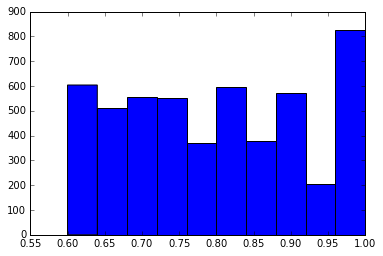

In [102]:
plt.hist(the_sums)


(array([  4.90000000e+02,   4.17600000e+03,   4.57000000e+02,
          0.00000000e+00,   4.00000000e+01,   4.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00]),
 array([ 1. ,  1.7,  2.4,  3.1,  3.8,  4.5,  5.2,  5.9,  6.6,  7.3,  8. ]),
 <a list of 10 Patch objects>)

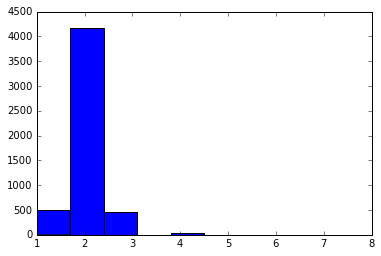

In [103]:
plt.hist(the_lengths)

In [ ]:
for i in range()